# Beräkning av grundvattenflöde kring spont

## Installera nödvändiga paket

Klicka på play-symbolen nedan för att installera nödvändiga paket.

In [1]:
!pip install calfem-python

## Importera nödvändiga Python bibliotek

In [4]:
import numpy as np
import calfem.core as cfc
import calfem.vis_mpl as cfv
import matplotlib.pyplot as plt

import flowmodel as fm # --- Beräkningsmodell för grundvatten

%matplotlib notebook

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

ModuleNotFoundError: No module named 'pandas'

## Problembeskrivning

Beräkning avser grundvattenströmning kring en spontkonstruktion enligt följande figur:

param_models.svg

## Modellparametrar

Parametrarna enligt figuren är satta enligt följande:

In [5]:
params = fm.ModelParams()

params.w = 100.0
params.h = 10.0
params.d = 5.0
params.t = 0.5
params.kx = 20.0
params.ky = 20.0

params.el_size_factor = 1 # Anger storlek på element
params.el_type = 2        # Element typ 2 = triangel, 3 = quad

NameError: name 'fm' is not defined

## Modelgeometri

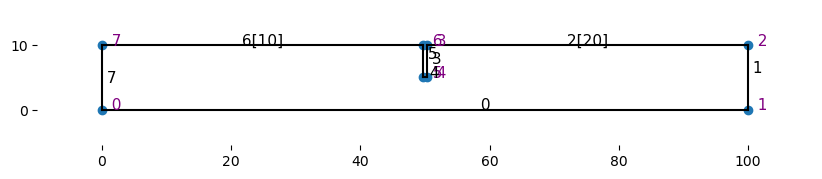

In [4]:
cfv.draw_geometry(params.geometry())

## Beräkning

In [5]:
results = fm.ModelResults()

solver = fm.ModelSolver(params, results)
solver.execute()

Info    : GMSH -> Python-module


## Resultat

### Elementnät

<IPython.core.display.Javascript object>


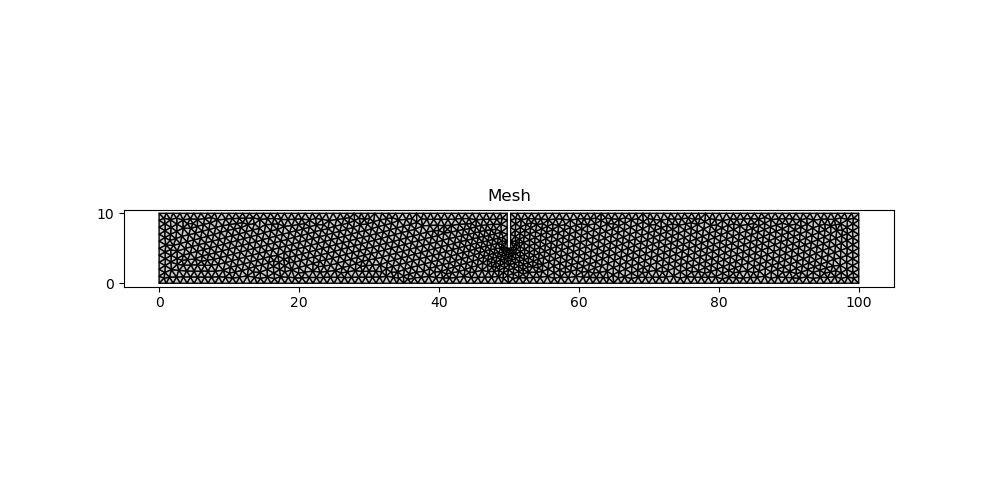

In [14]:
visualisation = fm.ModelVisualisation(params, results)

visualisation.show_mesh()

### Nodvärden

<IPython.core.display.Javascript object>


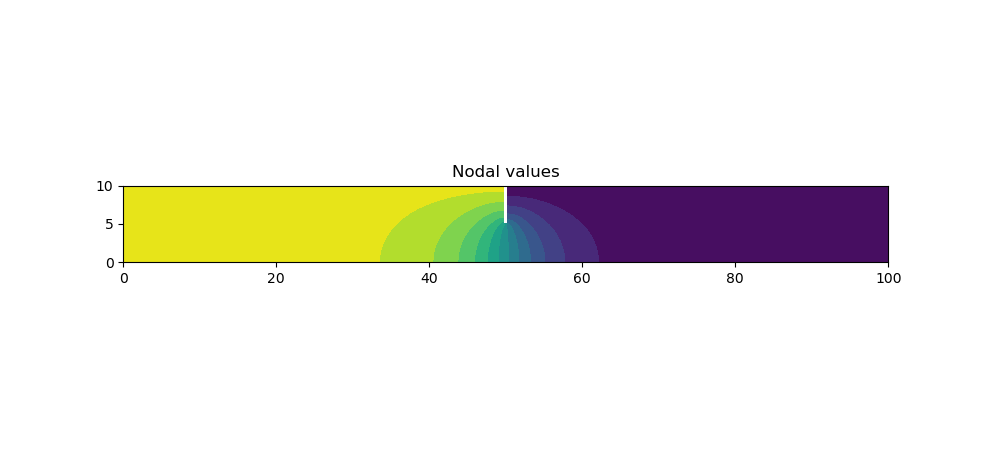

In [9]:
visualisation.show_nodal_values()

### Tabeller

In [10]:
result_tables = fm.ModelExport(params, results)

result_tables.parameters

,Parameter,Values
0,w [m],100.0
1,h [m],10.0
2,d [m],5.0
3,t [m],0.5
4,thickness [m],1.0
5,kx [m/day],20.0
6,ky [m/day],20.0


In [11]:
result_tables.result_summary

,Description,Value,Unit
0,Max piezometric head:,1.000000e+01,[m]
1,Min piezometric head:,0.000000e+00,[m]
2,Max boundary flow:,1.095904e+01,[m/day]
3,Min boundary flow:,-1.098949e+01,[m/day]
4,Sum boundary flow:,-2.177902e-12,[m/day]
5,Max resulting gw flow:,6.918079e+01,[m/day]
6,Min resulting gw flow:,1.386601e-03,[m/day]


In [12]:
result_tables.node_results

,dof,x_coord [m],y_coord [m],P.h. [m],q BC [m/day]
0,1,0.000000,0.000000,9.995841,-7.105427e-15
1,2,100.000000,0.000000,0.004161,-6.938894e-18
2,3,100.000000,10.000000,0.000000,-6.509058e-03
3,4,50.250000,10.000000,0.000000,-5.592029e+00
4,5,50.250000,5.000000,4.173389,5.684342e-14
...,...,...,...,...,...
1383,1384,95.072119,1.439675,0.005331,-3.330669e-16
1384,1385,18.578505,2.949140,9.965450,3.979039e-13
1385,1386,54.259598,2.182525,2.590610,-2.842171e-14
1386,1387,41.006378,1.323528,8.723269,1.989520e-13


In [13]:
result_tables.element_results

,N1,N2,N3,qx [m/day],qy [m/day],q_res [m/day],grad [-],grad [-]
0,81,82,835,0.420784,0.041415,0.422817,-0.021039,-0.002071
1,919,734,1288,11.898575,0.429192,11.906313,-0.594929,-0.021460
2,716,858,1004,0.183401,-0.059155,0.192705,-0.009170,0.002958
3,1002,660,1110,0.935488,-0.489315,1.055730,-0.046774,0.024466
4,715,581,1212,0.004296,0.010242,0.011106,-0.000215,-0.000512
...,...,...,...,...,...,...,...,...
2537,1339,850,1340,4.293283,16.128448,16.690090,-0.214664,-0.806422
2538,685,1305,1358,0.002168,0.012642,0.012827,-0.000108,-0.000632
2539,1256,850,1339,5.035614,14.749858,15.585753,-0.251781,-0.737493
2540,6,171,1353,15.013401,-30.747508,34.217122,-0.750670,1.537375
